In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [2]:
data_dictionary = pd.read_csv('/Users/mallikayeturi/Desktop/Dataset - ML/Data Dictionary.csv')
train_data = pd.read_csv('/Users/mallikayeturi/Desktop/Dataset - ML/Train.csv')
test_data = pd.read_csv('/Users/mallikayeturi/Desktop/Dataset - ML/Test.csv')
df = train_data

In [3]:
df.head()

,row_id,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,1,Bathroom Products,Health and Hygiene,Non-Consumable,4.35,1.3485,3,Double Down Sale,Canada,M,...,16418,4016,2678,1,1,1,1,1,Cash Register Handout,142.71
1,2,Fruit,Produce,Food,5.58,1.8414,3,Shelf Clearing Days,USA,S,...,13305,4746,3164,1,0,0,0,0,Radio,99.77
2,3,Beer and Wine,Alcoholic Beverages,Drink,5.10,2.1420,3,Two Day Sale,Mexico,S,...,20141,6393,4262,1,1,1,1,1,Product Attachment,76.88
3,4,Fruit,Canned Products,Food,4.20,2.0580,3,Cash Register Lottery,USA,S,...,18670,5415,3610,1,1,1,1,1,"Daily Paper, Radio, TV",55.59
4,5,Paper Products,Household,Non-Consumable,10.35,3.5190,3,One Day Sale,Mexico,S,...,30351,4819,3213,0,0,0,0,0,Street Handout,146.72


In [4]:
df.describe()

,row_id,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,36256.000000,36256.000000,36256.000000,36256.000000,36256.000000,36256.000000,36256.000000,36256.000000,36256.000000,36256.000000,...,36256.000000,36256.000000,36256.000000,36256.000000,36256.000000,36256.000000,36256.000000,36256.000000,36256.000000,36256.000000
mean,18128.500000,6.549142,2.620838,3.093143,2.545068,2.197705,0.836496,2.197705,2.118466,13.782083,...,27989.289607,19135.198257,5312.500745,3541.612037,0.612478,0.354093,0.587848,0.587848,0.562307,99.259256
std,10466.350016,3.466700,1.453903,0.828942,1.487449,1.110560,1.308415,1.110560,0.932304,4.614967,...,5701.667512,3989.400923,1575.771528,1050.381028,0.487191,0.478244,0.492229,0.492229,0.496109,30.009967
min,1.000000,0.520000,0.179200,1.000000,0.000000,0.000000,0.000000,0.000000,0.500000,6.000000,...,20319.000000,13305.000000,2452.000000,1635.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,9064.750000,3.800000,1.500000,3.000000,1.000000,1.000000,0.000000,1.000000,1.420000,9.700000,...,23593.000000,16232.000000,4746.000000,3164.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.650000
50%,18128.500000,5.940000,2.385600,3.000000,3.000000,2.000000,0.000000,2.000000,2.130000,13.600000,...,27694.000000,18670.000000,5062.000000,3375.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.520000
75%,27192.250000,8.670000,3.485400,4.000000,4.000000,3.000000,1.000000,3.000000,2.790000,17.700000,...,30797.000000,22123.000000,5751.000000,3834.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,36256.000000,22.920000,9.726500,6.000000,5.000000,4.000000,5.000000,4.000000,3.980000,21.900000,...,39696.000000,30351.000000,9184.000000,6122.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


In [5]:
df.shape

(36256, 41)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36256 entries, 0 to 36255
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   row_id                      36256 non-null  int64  
 1   food_category               36256 non-null  object 
 2   food_department             36256 non-null  object 
 3   food_family                 36256 non-null  object 
 4   store_sales(in millions)    36256 non-null  float64
 5   store_cost(in millions)     36256 non-null  float64
 6   unit_sales(in millions)     36256 non-null  int64  
 7   promotion_name              36256 non-null  object 
 8   sales_country               36256 non-null  object 
 9   marital_status              36256 non-null  object 
 10  gender                      36256 non-null  object 
 11  total_children              36256 non-null  int64  
 12  education                   36256 non-null  object 
 13  member_card                 362

In [7]:
df.columns

Index(['row_id', 'food_category', 'food_department', 'food_family',
       'store_sales(in millions)', 'store_cost(in millions)',
       'unit_sales(in millions)', 'promotion_name', 'sales_country',
       'marital_status', 'gender', 'total_children', 'education',
       'member_card', 'occupation', 'houseowner', 'avg_cars_at home(approx)',
       'avg. yearly_income', 'num_children_at_home',
       'avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
       'net_weight', 'recyclable_package', 'low_fat', 'units_per_case',
       'store_type', 'store_city', 'store_state', 'store_sqft', 'grocery_sqft',
       'frozen_sqft', 'meat_sqft', 'coffee_bar', 'video_store', 'salad_bar',
       'prepared_food', 'florist', 'media_type', 'cost'],
      dtype='object')

In [8]:
df.isnull().sum()

row_id                        0
food_category                 0
food_department               0
food_family                   0
store_sales(in millions)      0
store_cost(in millions)       0
unit_sales(in millions)       0
promotion_name                0
sales_country                 0
marital_status                0
gender                        0
total_children                0
education                     0
member_card                   0
occupation                    0
houseowner                    0
avg_cars_at home(approx)      0
avg. yearly_income            0
num_children_at_home          0
avg_cars_at home(approx).1    0
brand_name                    0
SRP                           0
gross_weight                  0
net_weight                    0
recyclable_package            0
low_fat                       0
units_per_case                0
store_type                    0
store_city                    0
store_state                   0
store_sqft                    0
grocery_

In [9]:
df.duplicated().sum()

0

In [10]:
df_num = df.select_dtypes(include = 'number')
df_num

,row_id,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,1,4.35,1.3485,3,2,2,1,2,1.45,9.65,...,23112,16418,4016,2678,1,1,1,1,1,142.71
1,2,5.58,1.8414,3,4,2,0,2,1.86,18.40,...,21215,13305,4746,3164,1,0,0,0,0,99.77
2,3,5.10,2.1420,3,2,2,0,2,1.70,11.20,...,30797,20141,6393,4262,1,1,1,1,1,76.88
3,4,4.20,2.0580,3,2,1,0,1,1.40,17.90,...,27694,18670,5415,3610,1,1,1,1,1,55.59
4,5,10.35,3.5190,3,5,3,0,3,3.45,18.60,...,38382,30351,4819,3213,0,0,0,0,0,146.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36251,36252,8.25,3.5475,3,5,3,5,3,2.75,9.24,...,33858,22123,7041,4694,1,0,1,1,1,115.13
36252,36253,5.55,1.8870,3,4,2,0,2,1.85,16.40,...,23688,15337,5011,3340,1,1,1,1,1,53.82
36253,36254,6.08,2.5536,4,5,2,5,2,1.52,10.70,...,33858,22123,7041,4694,1,0,1,1,1,69.65
36254,36255,5.28,2.4288,3,3,0,0,0,1.76,8.69,...,30797,20141,6393,4262,1,1,1,1,1,90.77


In [11]:
c = df_num.corr().abs()

In [12]:
correlation_matrix = c.sort_values("cost",kind = "quicksort")
correlation_matrix

,row_id,store_sales(in millions),store_cost(in millions),unit_sales(in millions),total_children,avg_cars_at home(approx),num_children_at_home,avg_cars_at home(approx).1,SRP,gross_weight,...,store_sqft,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
store_cost(in millions),0.005028,0.954581,1.000000,0.479117,0.082782,0.006720,0.029295,0.006720,0.795316,0.037034,...,0.015065,0.012020,0.014448,0.014444,0.026356,0.016980,0.031570,0.031570,0.032254,0.000141
low_fat,0.004782,0.008711,0.008365,0.000711,0.001881,0.007072,0.002694,0.007072,0.006787,0.034884,...,0.000090,0.006005,0.009318,0.009316,0.002651,0.004381,0.002147,0.002147,0.003824,0.000265
recyclable_package,0.011285,0.034957,0.033598,0.003345,0.005688,0.005650,0.002693,0.005650,0.043054,0.044724,...,0.008185,0.007073,0.007027,0.007030,0.000289,0.000035,0.003104,0.003104,0.001361,0.000465
store_sales(in millions),0.002906,1.000000,0.954581,0.503579,0.086546,0.008118,0.033903,0.008118,0.832361,0.038835,...,0.010068,0.007351,0.010691,0.010687,0.029310,0.015935,0.027584,0.027584,0.031109,0.001083
gross_weight,0.002078,0.038835,0.037034,0.001717,0.000260,0.003244,0.006414,0.003244,0.047149,1.000000,...,0.007134,0.004241,0.009045,0.009045,0.001763,0.001189,0.000868,0.000868,0.001355,0.001853
net_weight,0.001189,0.034354,0.032644,0.001903,0.000132,0.002776,0.006260,0.002776,0.041906,0.988884,...,0.005407,0.002540,0.007880,0.007880,0.002321,0.000561,0.000233,0.000233,0.001231,0.002197
total_children,0.002720,0.086546,0.082782,0.164874,1.000000,0.102020,0.394563,0.102020,0.002853,0.000260,...,0.000281,0.017199,0.026742,0.026739,0.003319,0.000372,0.012697,0.012697,0.007450,0.003149
row_id,1.000000,0.002906,0.005028,0.013579,0.002720,0.008574,0.004935,0.008574,0.006304,0.002078,...,0.004236,0.004419,0.002483,0.002483,0.001385,0.001726,0.003878,0.003878,0.004024,0.004390
num_children_at_home,0.004935,0.033903,0.029295,0.069049,0.394563,0.135342,1.000000,0.135342,0.000623,0.006414,...,0.006508,0.024444,0.023008,0.023002,0.016626,0.013309,0.023822,0.023822,0.011670,0.005734
SRP,0.006304,0.832361,0.795316,0.004628,0.002853,0.005617,0.000623,0.005617,1.000000,0.047149,...,0.003826,0.003637,0.002783,0.002784,0.000849,0.003742,0.004474,0.004474,0.000486,0.005738


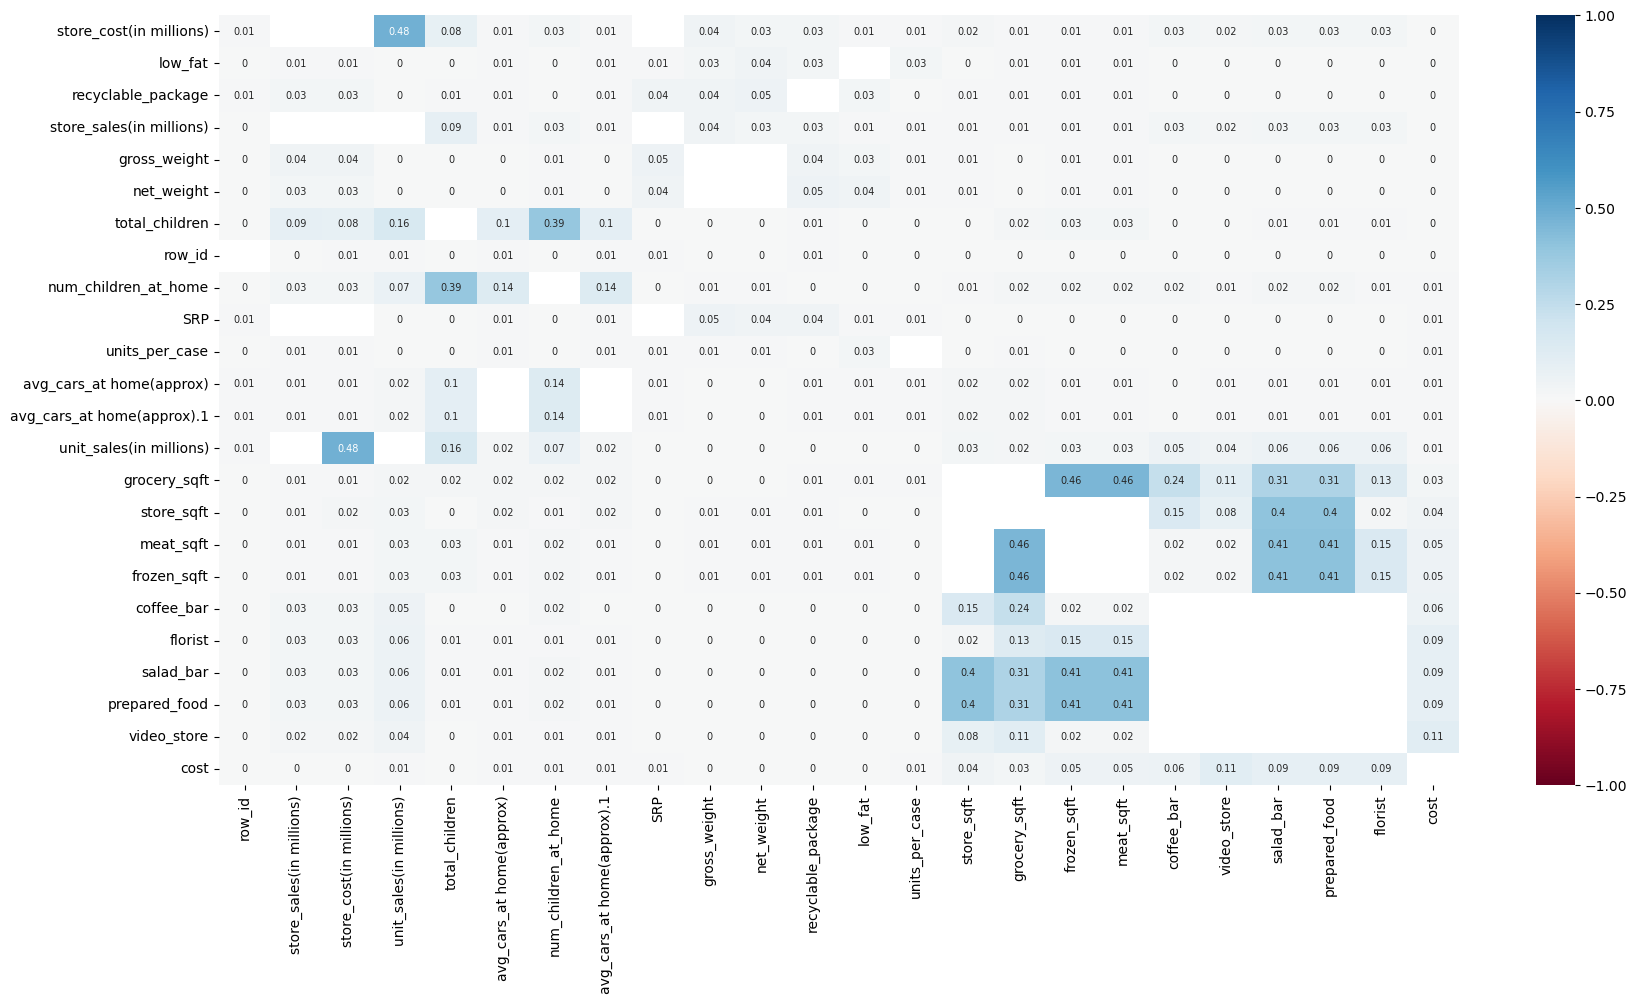

In [13]:
plt.figure(figsize = (20,10))
sns.heatmap(round(correlation_matrix,2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1, mask = (np.abs(correlation_matrix) >= 0.5));
plt.show()

# Looking at correlation heatmap

* store sales and store cost show a very high correlation,
* store cost and unit_sales with close to 0.5
* meat_sqft and frozen_sqft
* salad_bar and store_sqft
* prepared_sqft and store_sqft
* grocery_sqft and frozen_sqft

<Axes: xlabel='num_children_at_home'>

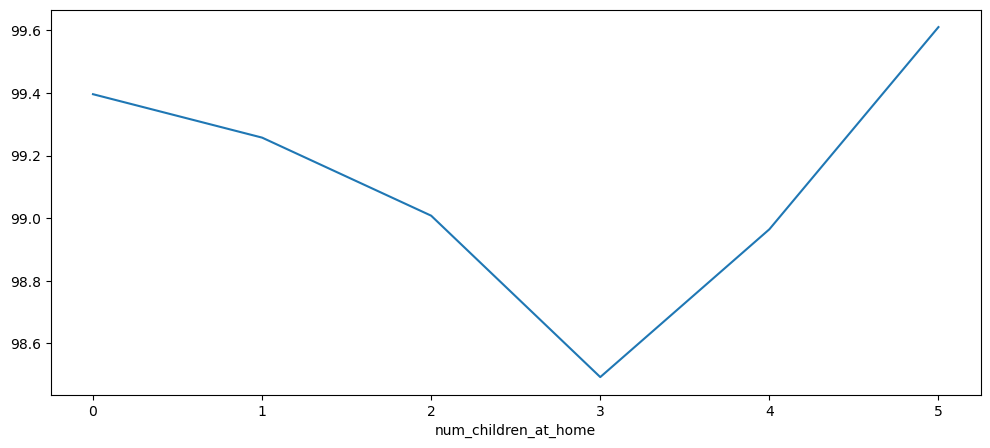

In [14]:
plt.figure(figsize=(12,5))
df.groupby('num_children_at_home')['cost'].mean().plot()

<Axes: xlabel='avg. yearly_income'>

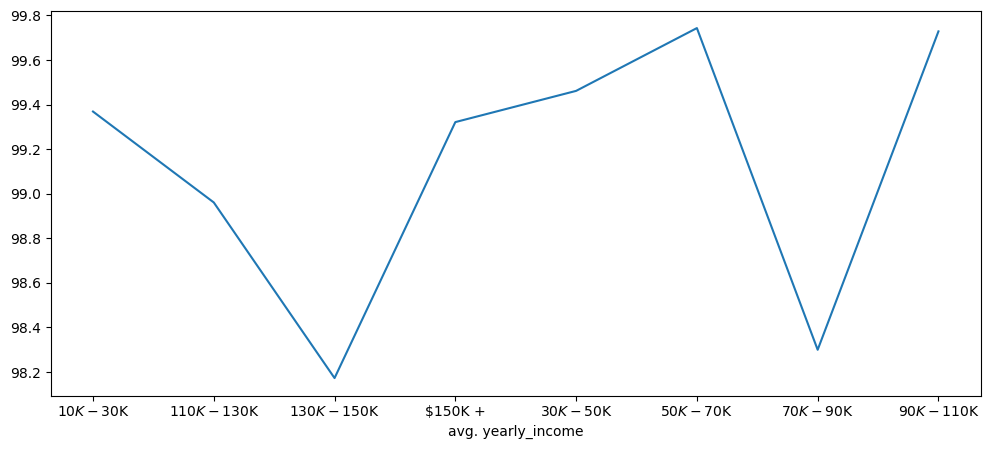

In [15]:
plt.figure(figsize=(12,5))
df.groupby('avg. yearly_income')['cost'].mean().plot()

<Axes: xlabel='gender', ylabel='count'>

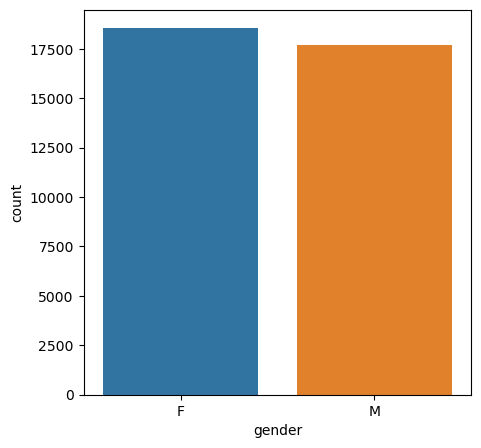

In [16]:
plt.figure(figsize = (5,5))
sns.countplot(x = df['gender'])

/var/folders/cl/mky1m2kn2kvb370dm1v3c2mh0000gn/T/ipykernel_16287/3283810391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['store_sales(in millions)'])


<Axes: ylabel='Density'>

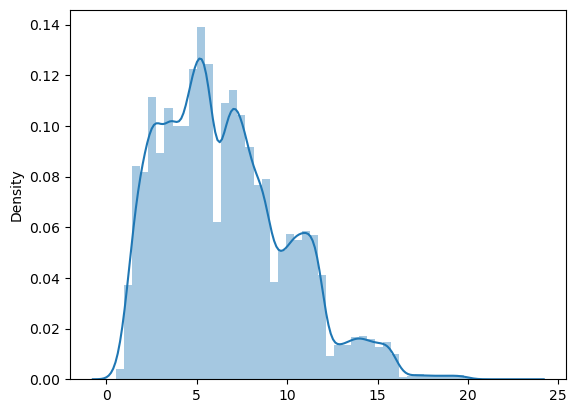

In [17]:
sns.distplot(x = df['store_sales(in millions)'])

/var/folders/cl/mky1m2kn2kvb370dm1v3c2mh0000gn/T/ipykernel_16287/3355691411.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df['store_cost(in millions)'])


<Axes: ylabel='Density'>

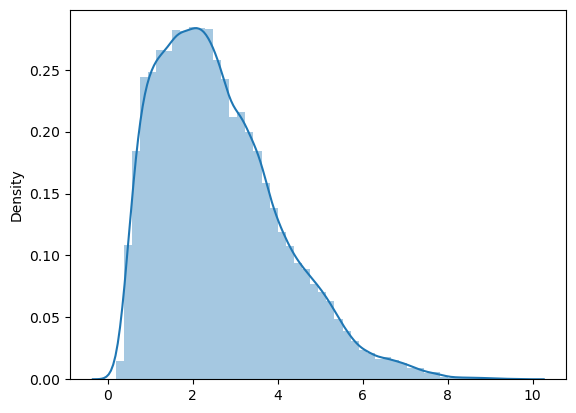

In [18]:
sns.distplot(x = df['store_cost(in millions)'])

In [19]:
gr1 = df.groupby('media_type')['cost']
gr1.sum().to_frame()

,cost
media_type,
Bulk Mail,215651.10
Cash Register Handout,275993.02
Daily Paper,274804.51
"Daily Paper, Radio",399954.52
"Daily Paper, Radio, TV",287748.82
In-Store Coupon,269458.93
Product Attachment,336279.28
Radio,289153.08
Street Handout,330222.40


In [20]:
gr2 = df.groupby('gender')['cost']
gr2.sum().to_frame()

,cost
gender,
F,1847927.83
M,1750815.76


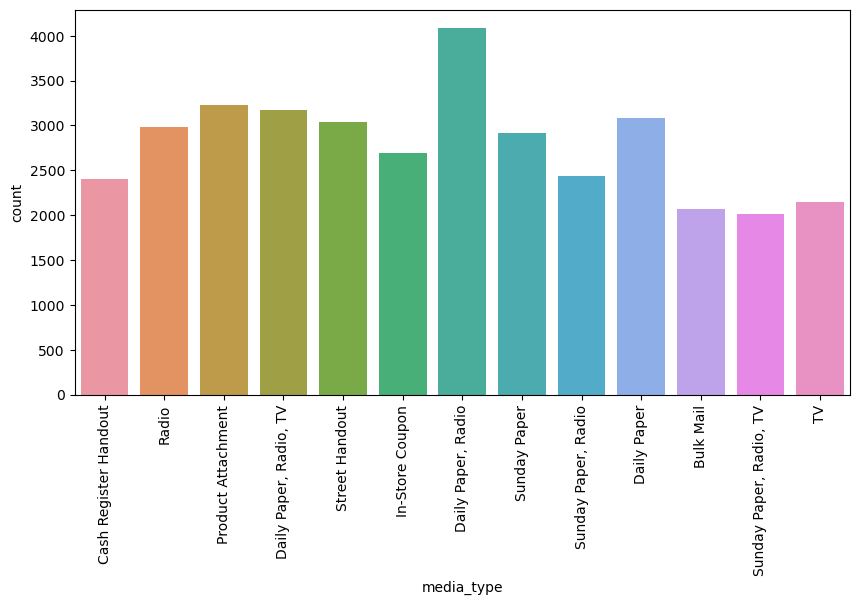

In [21]:
plt.figure(figsize = (10,5))
sns.countplot(x = df['media_type'])
plt.xticks(rotation = 90)
plt.show()

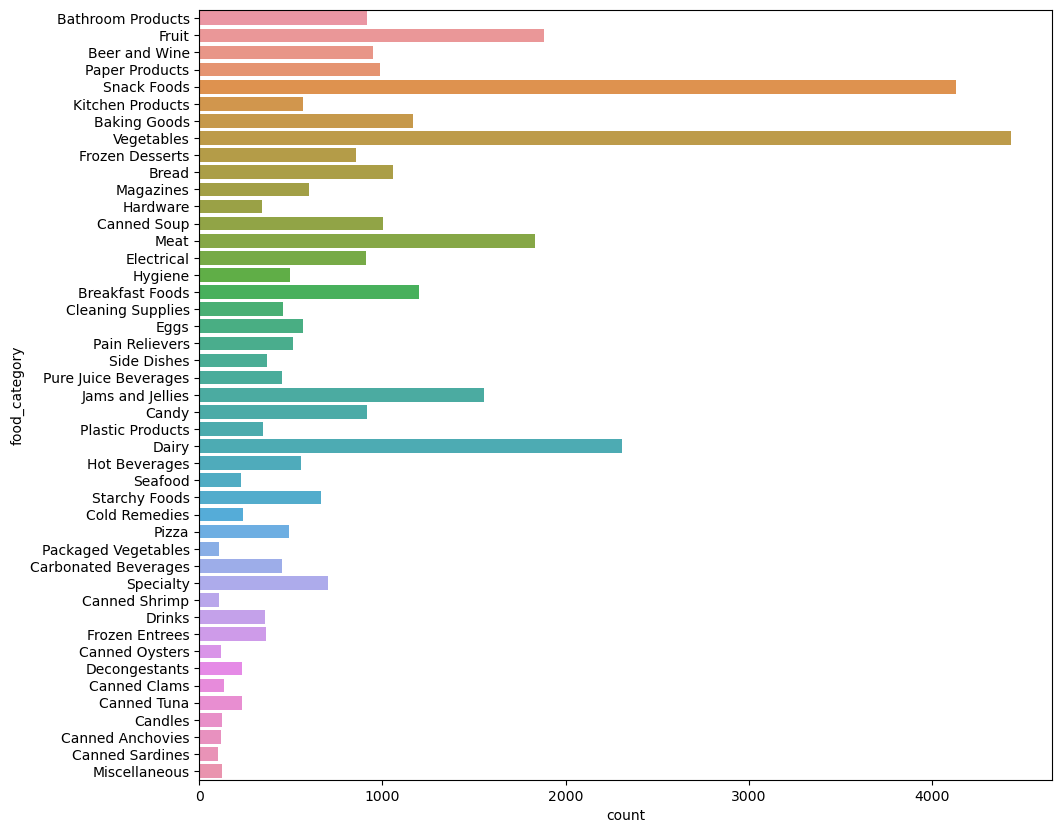

In [22]:
plt.figure(figsize = (11,10))
sns.countplot(y = df['food_category'])
plt.show()

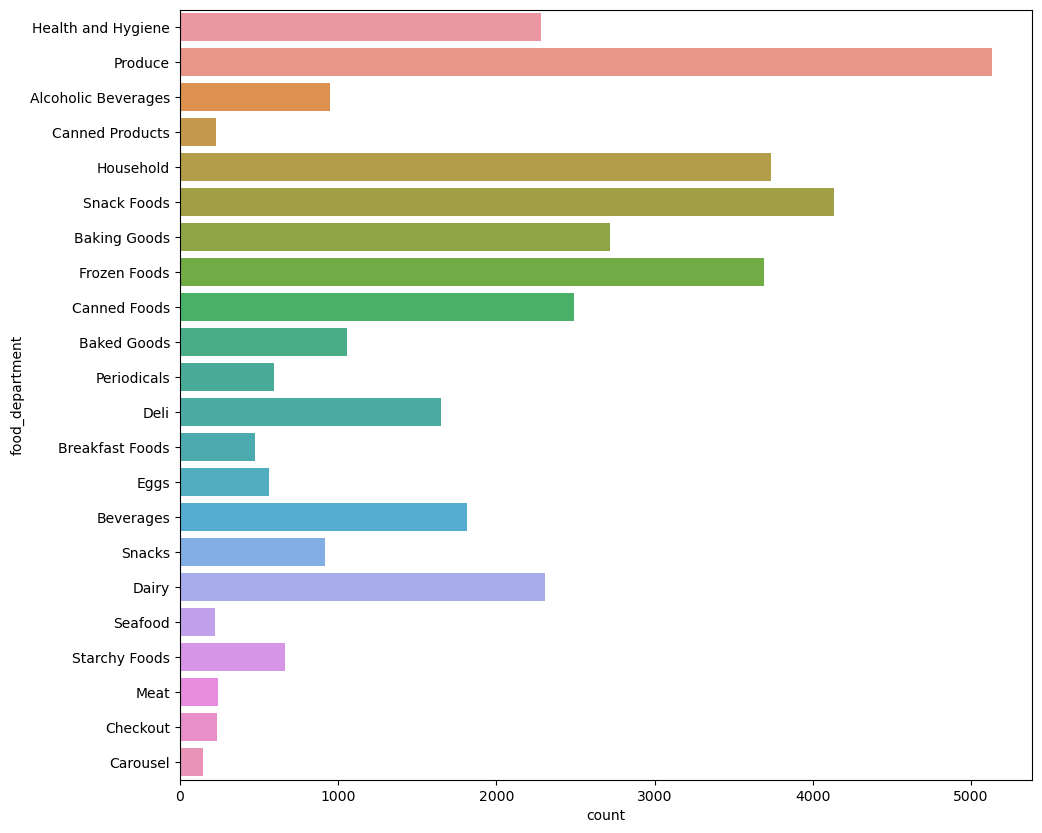

In [23]:
plt.figure(figsize = (11,10))
sns.countplot(y = df['food_department'])
plt.show()

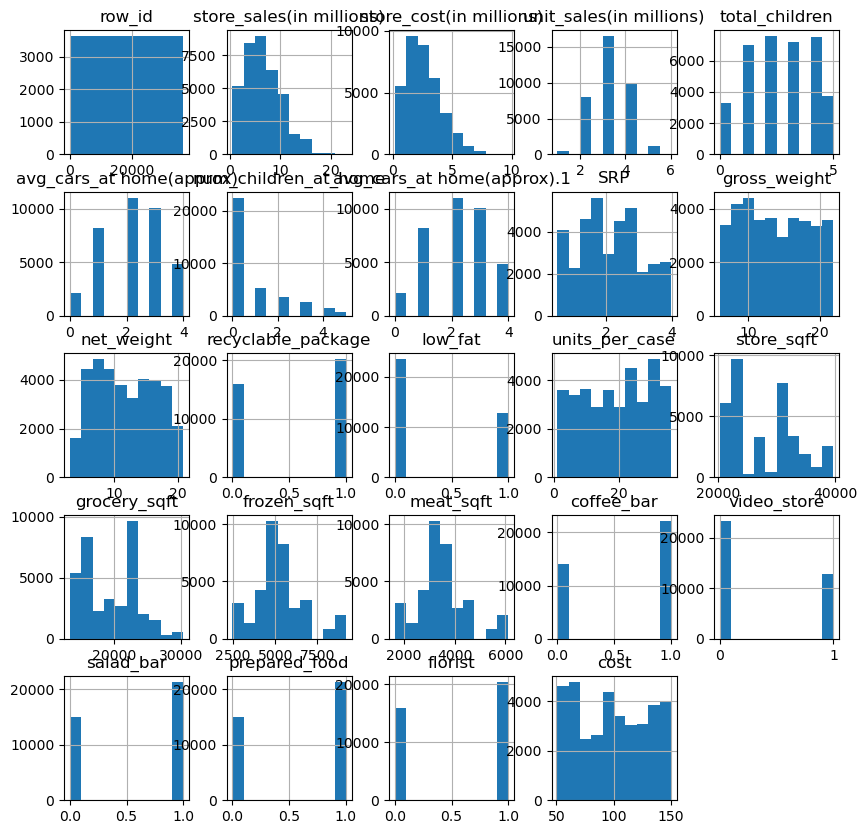

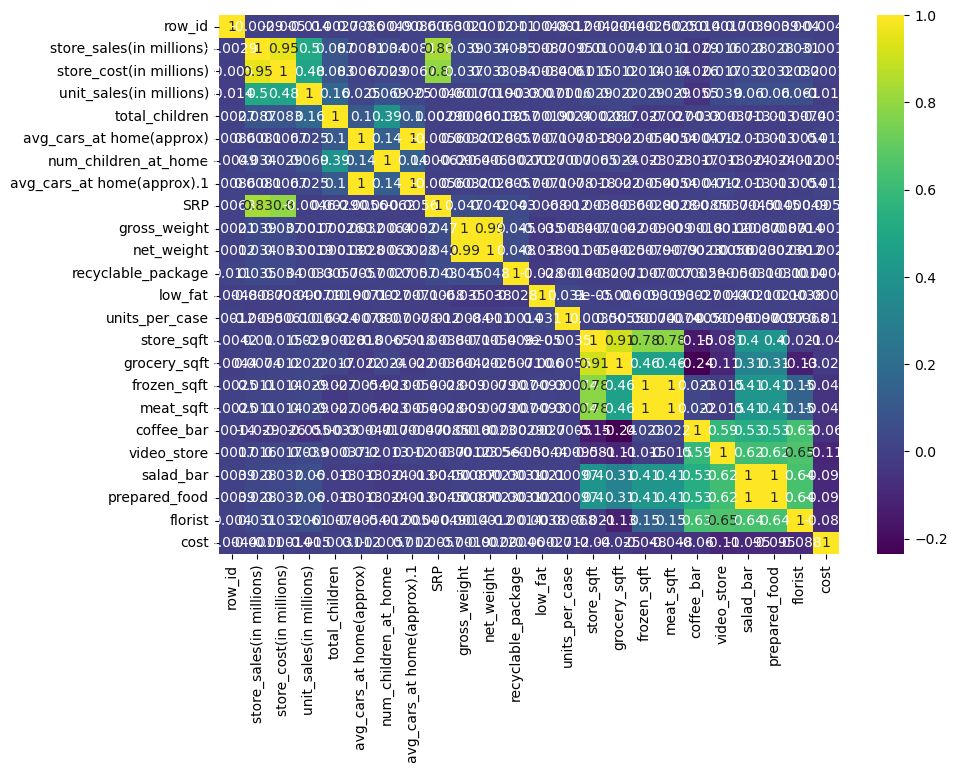

In [24]:
numerical_df = df.select_dtypes(include=np.number)

df.hist(figsize=(10, 10))
plt.show()

plt.figure(figsize=(10, 7))
sns.heatmap(numerical_df.corr(), annot=True, cmap='viridis')
plt.show()

In [25]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('cost')
categorical_cols = df.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)])

In [26]:
for feature in df:
    print("The feature {} has {} number of categories".format(feature, len(df[feature].unique())))

The feature row_id has 36256 number of categories
The feature food_category has 45 number of categories
The feature food_department has 22 number of categories
The feature food_family has 3 number of categories
The feature store_sales(in millions) has 1003 number of categories
The feature store_cost(in millions) has 8758 number of categories
The feature unit_sales(in millions) has 6 number of categories
The feature promotion_name has 49 number of categories
The feature sales_country has 3 number of categories
The feature marital_status has 2 number of categories
The feature gender has 2 number of categories
The feature total_children has 6 number of categories
The feature education has 5 number of categories
The feature member_card has 4 number of categories
The feature occupation has 5 number of categories
The feature houseowner has 2 number of categories
The feature avg_cars_at home(approx) has 5 number of categories
The feature avg. yearly_income has 8 number of categories
The featu

In [27]:
from sklearn.preprocessing import LabelEncoder

In [28]:
le = LabelEncoder()

In [29]:
df[df.select_dtypes(include='object').columns] = df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36256 entries, 0 to 36255
Data columns (total 41 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   row_id                      36256 non-null  int64  
 1   food_category               36256 non-null  int64  
 2   food_department             36256 non-null  int64  
 3   food_family                 36256 non-null  int64  
 4   store_sales(in millions)    36256 non-null  float64
 5   store_cost(in millions)     36256 non-null  float64
 6   unit_sales(in millions)     36256 non-null  int64  
 7   promotion_name              36256 non-null  int64  
 8   sales_country               36256 non-null  int64  
 9   marital_status              36256 non-null  int64  
 10  gender                      36256 non-null  int64  
 11  total_children              36256 non-null  int64  
 12  education                   36256 non-null  int64  
 13  member_card                 362

In [31]:
# Dropping columns
df1 = df.drop(columns=[
    'row_id', 'food_category', 'food_department','store_sales(in millions)', 'store_cost(in millions)',
    'unit_sales(in millions)', 'marital_status', 'gender',  'education','occupation', 'houseowner', 
    'avg_cars_at home(approx)','num_children_at_home','avg_cars_at home(approx).1', 'brand_name', 'SRP', 'gross_weight',
    'net_weight','store_city', 'store_state', 'store_sqft', 'grocery_sqft',
    'frozen_sqft', 'meat_sqft', 
])

In [32]:
df2 = pd.get_dummies(df1,columns = ['food_family','promotion_name','sales_country','media_type'])

In [33]:
df2.shape

(36256, 81)

In [34]:
df2.sample(3)

,total_children,member_card,avg. yearly_income,recyclable_package,low_fat,units_per_case,store_type,coffee_bar,video_store,salad_bar,...,media_type_3,media_type_4,media_type_5,media_type_6,media_type_7,media_type_8,media_type_9,media_type_10,media_type_11,media_type_12
29301,1,2,0,0,0,30,1,1,0,1,...,False,True,False,False,False,False,False,False,False,False
4049,2,1,7,1,0,6,0,1,1,1,...,False,False,False,False,False,True,False,False,False,False
15735,2,0,2,0,0,29,4,1,0,0,...,False,False,False,False,True,False,False,False,False,False


In [35]:
# Separating the target variable
X = df2.drop('cost',axis = 1)
y = df2['cost']

In [36]:
# Splitting the data into X,y train and test data set
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.7, test_size = 0.3, random_state = 42)

In [37]:
print('.'*34)
print('X_Train data shape : ',X_train.shape)
print('X_Test data shape  : ',X_test.shape )
print('.'*34)
print('y_Train data shape : ',y_train.shape)
print('y_Test data shape  : ',y_test.shape )
print('.'*34)

..................................
X_Train data shape :  (25379, 80)
X_Test data shape  :  (10877, 80)
..................................
y_Train data shape :  (25379,)
y_Test data shape  :  (10877,)
..................................


# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [39]:
lr_model.score(X_train,y_train)

0.3380117227073749

In [40]:
lr_model.score(X_test,y_test)

0.32616430342080716

In [41]:
lr_model.coef_

array([ 9.43692632e-02,  1.14281244e-01, -9.91537125e-02, -5.16056745e-01,
       -2.06612643e-01, -1.96545089e-02, -8.15391948e-02, -4.44016326e-01,
       -4.81770415e+00, -1.43622579e+11,  1.43622579e+11, -2.82161445e+00,
       -7.14123739e+11, -7.14123739e+11, -7.14123739e+11,  4.47814542e+10,
        4.47814542e+10,  4.47814542e+10,  4.47814542e+10,  4.47814542e+10,
        4.47814542e+10,  4.47814542e+10,  4.47814542e+10,  4.47814542e+10,
        4.47814542e+10,  4.47814542e+10,  4.47814542e+10,  4.47814542e+10,
        4.47814542e+10,  4.47814542e+10,  4.47814542e+10,  4.47814542e+10,
        4.47814542e+10,  4.47814542e+10,  4.47814542e+10,  4.47814542e+10,
        4.47814542e+10,  4.47814542e+10,  4.47814542e+10,  4.47814542e+10,
        4.47814542e+10,  4.47814542e+10,  4.47814541e+10,  4.47814542e+10,
        4.47814542e+10,  4.47814542e+10,  4.47814542e+10,  4.47814542e+10,
        4.47814542e+10,  4.47814542e+10,  4.47814542e+10,  4.47814542e+10,
        4.47814542e+10,  

In [42]:
pred_y = lr_model.predict(X_test)

In [43]:
pred_y

array([101.40942383, 135.64465332, 100.76403809, ...,  93.66052246,
       120.31872559, 103.18347168])

Text(0, 0.5, 'pred_y')

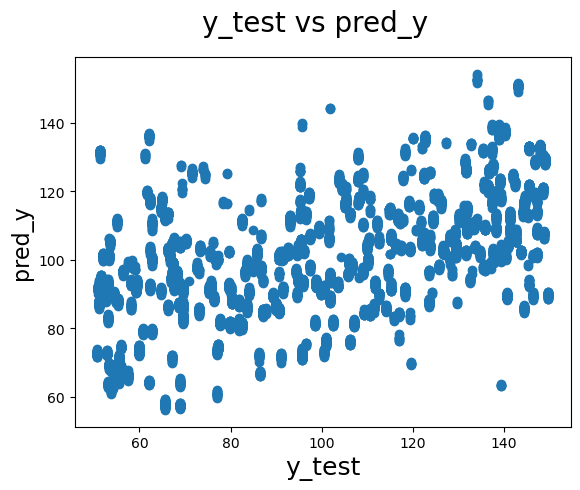

In [44]:
fig = plt.figure()
plt.scatter(y_test, pred_y)
fig.suptitle('y_test vs pred_y', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('pred_y', fontsize = 16)  

In [45]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,max_error,r2_score
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred_y))
print('\nMean Squared Error: ', mean_squared_error(y_test,pred_y))
print('\nRoot Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred_y)))
print('\nMax Error: ', max_error(y_test,pred_y))
print('\nR2 Score: ', r2_score(y_test,pred_y))

Mean Absolute Error:  20.153233077286075

Mean Squared Error:  607.6689654479352

Root Mean Absolute Error:  4.489235244146387

Max Error:  80.93422363281249

R2 Score:  0.32616430342080716


In [46]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import  metrics

In [47]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(max_iter = 300)
mlp.fit(X_train,y_train)
print('Attempting to fit MLP Regressor')

Attempting to fit MLP Regressor


In [48]:
%%time
y_pred_val_mlp = mlp.predict(X_test)
print('MAE on Validation set :',metrics.mean_absolute_error(y_test, y_pred_val_mlp))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(y_test, y_pred_val_mlp))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(y_test, y_pred_val_mlp)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(y_test, y_pred_val_mlp))
print("\n")

MAE on Validation set : 1.2196708418998436


MSE on Validation set : 13.197553179322938


RMSE on Validation set : 1.1043870887962444


R2 Score on Validation set : 0.9853654161305166


CPU times: user 65.5 ms, sys: 72.2 ms, total: 138 ms
Wall time: 18.3 ms


In [49]:
from sklearn.tree import DecisionTreeRegressor

dc = DecisionTreeRegressor(random_state = 0)
dc.fit(X_train,y_train)
print('Attempting to fit Decision Tree Regressor')

Attempting to fit Decision Tree Regressor


In [50]:
%%time
y_pred_val_dc = dc.predict(X_test)
print('MAE on Validation set :',metrics.mean_absolute_error(y_test, y_pred_val_dc))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(y_test, y_pred_val_dc))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(y_test, y_pred_val_dc)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(y_test, y_pred_val_dc))
print("\n")

MAE on Validation set : 0.25938677944297983


MSE on Validation set : 18.38919291164843


RMSE on Validation set : 0.5093002841575683


R2 Score on Validation set : 0.9796084787611036


CPU times: user 15.5 ms, sys: 53.5 ms, total: 69 ms
Wall time: 9.62 ms


In [51]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
print('Attempting to fit Random Forest Regressor')

Attempting to fit Random Forest Regressor


In [52]:
%%time
y_pred_val_rf = rf.predict(X_test)
print('MAE on Validation set :',metrics.mean_absolute_error(y_test, y_pred_val_rf))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(y_test, y_pred_val_rf))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(y_test, y_pred_val_rf)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(y_test, y_pred_val_rf))
print("\n")

MAE on Validation set : 0.3277283970765227


MSE on Validation set : 12.476854550819915


RMSE on Validation set : 0.5724756737858149


R2 Score on Validation set : 0.9861645888544405


CPU times: user 90.5 ms, sys: 1.16 ms, total: 91.6 ms
Wall time: 91.2 ms


In [53]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(X_train,y_train)
print('Attempting to fit Support Vector Regressor')

Attempting to fit Support Vector Regressor


In [54]:
%%time
y_pred_val_svm = svm.predict(X_test)
print('MAE on Validation set :',metrics.mean_absolute_error(y_test, y_pred_val_svm))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(y_test, y_pred_val_svm))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(y_test, y_pred_val_svm)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(y_test, y_pred_val_svm))
print("\n")

MAE on Validation set : 24.938620113308


MSE on Validation set : 859.955541365149


RMSE on Validation set : 4.993858239208238


R2 Score on Validation set : 0.04640721479700005


CPU times: user 24.5 s, sys: 11.1 ms, total: 24.5 s
Wall time: 24.6 s


In [55]:
from sklearn.ensemble import GradientBoostingRegressor
gbc = GradientBoostingRegressor()
gbc.fit(X_train,y_train)
print('Attempting to fit Gradient Boosting Regressor')

Attempting to fit Gradient Boosting Regressor


In [56]:
%%time
y_pred_val_gbc = gbc.predict(X_test)
print('MAE on Validation set :',metrics.mean_absolute_error(y_test, y_pred_val_gbc))
print("\n")
print('MSE on Validation set :',metrics.mean_squared_error(y_test, y_pred_val_gbc))
print("\n")
print('RMSE on Validation set :',np.sqrt(metrics.mean_absolute_error(y_test, y_pred_val_gbc)))
print("\n")
print('R2 Score on Validation set :',metrics.r2_score(y_test, y_pred_val_gbc))
print("\n")

MAE on Validation set : 17.33272487165017


MSE on Validation set : 432.48913165322887


RMSE on Validation set : 4.163258924406477


R2 Score on Validation set : 0.5204187940128513


CPU times: user 7.36 ms, sys: 1.51 ms, total: 8.87 ms
Wall time: 8.28 ms


In [57]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest,f_regression

In [58]:
from sklearn.model_selection import GridSearchCV

In [59]:
pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('skb' , SelectKBest(f_regression)),
    ('rf', RandomForestRegressor())
      ])

In [60]:
pipe_rf

Pipeline(steps=[('scaler', StandardScaler()),
                ('skb',
                 SelectKBest(score_func=<function f_regression at 0x16bf22340>)),
                ('rf', RandomForestRegressor())])

In [61]:
grid = { 
    'skb__k' : [50,67,70,80],
    'rf__n_estimators': [300,400,500,600,100],
    'rf__max_features': ['sqrt','log2'],
    'rf__random_state' : [0,2]
}

In [62]:
clf_rf = GridSearchCV(pipe_rf, grid, cv=10, verbose=0,n_jobs=-1)
clf_rf

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('skb',
                                        SelectKBest(score_func=<function f_regression at 0x16bf22340>)),
                                       ('rf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rf__max_features': ['sqrt', 'log2'],
                         'rf__n_estimators': [300, 400, 500, 600, 100],
                         'rf__random_state': [0, 2],
                         'skb__k': [50, 67, 70, 80]})

In [63]:
clf_rf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('skb',
                                        SelectKBest(score_func=<function f_regression at 0x16bf22340>)),
                                       ('rf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rf__max_features': ['sqrt', 'log2'],
                         'rf__n_estimators': [300, 400, 500, 600, 100],
                         'rf__random_state': [0, 2],
                         'skb__k': [50, 67, 70, 80]})